# Identificação:
Nome: Adriano Ulrich do Prado Wiedmann

---


Matrícula: 202014824




In [ ]:
#allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import sys

!unzip -q "/content/drive/MyDrive/TopEng/DP2/Utilidades-TP2.zip"
!cat '/content/drive/My Drive/TopEng/DP2/utils.py'
sys.path.append('/content/drive/My Drive/TopEng/DP2')

import sys
import numpy as np
from matplotlib import pyplot


def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim >

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [ ]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Utilidades/Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [ ]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data
    points with * for the positive examples and o for the negative examples.

    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset.

    y : array_like
        Label values for the dataset. A vector of size (M, ).

    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.
    """
    # Create New Figure
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

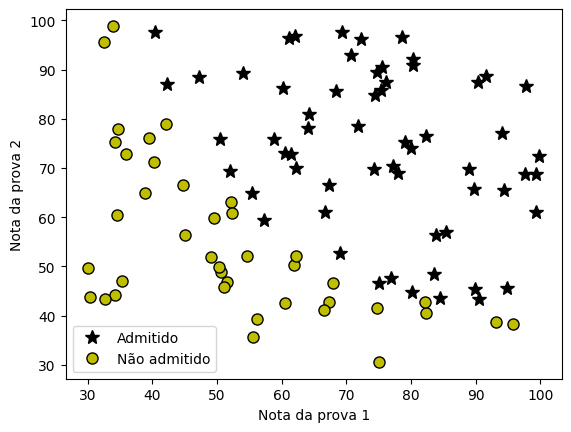

In [ ]:
plotData(X, y)
# add axes labels
pyplot.xlabel('Nota da prova 1')
pyplot.ylabel('Nota da prova 2')
pyplot.legend(['Admitido', 'Não admitido'])
pass

In [ ]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.

    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector
        or a 2-D matrix.

    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.

    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)

    # You need to return the following variables correctly
    g = np.zeros(z.shape)

    # Usando np.exp() de numpy para exponencial
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


Text(0, 0.5, 'y1')

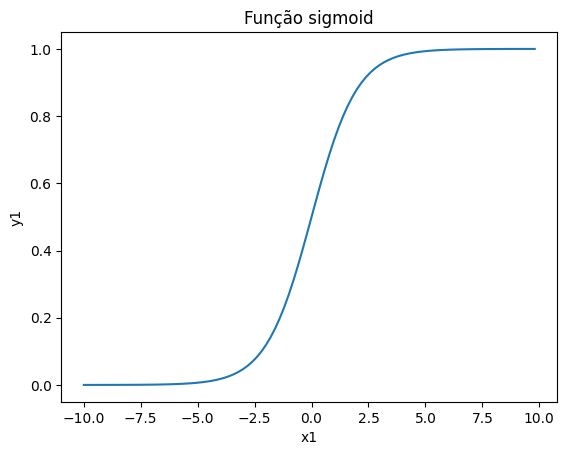

In [ ]:
x1 = np.arange(-10, 10, 0.2)
y1 = sigmoid(x1)

pyplot.plot(x1, y1)
pyplot.title('Função sigmoid')
pyplot.xlabel('x1')
pyplot.ylabel('y1')

In [ ]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression.

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).

    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the
        intercept has already been added to the input.

    y : arra_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    J : float
        The computed value for the cost function.

    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.

    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)

    # Cust function:
    h = sigmoid(np.dot(X, theta))
    J = 1/m * np.sum(np.dot(-y,np.log(h)) - np.dot(1-y,np.log(1-h)))

    # Gradient
    grad = 1/m * np.dot(h-y, X)

    return J, grad

In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Custo com o theta inicial (zeros): {:.3f}'.format(cost))
print('Custo esperado (aproximado): 0.693\n')

print('Gradiente com o theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Custo com o theta de teste: {:.3f}'.format(cost))
print('Custo esperado (aproximado): 0.218\n')

print('Gradiente com o theta de teste:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

Custo com o theta inicial (zeros): 0.693
Custo esperado (aproximado): 0.693

Gradiente com o theta inicial (zeros):
	[-0.1000, -12.0092, -11.2628]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]

Custo com o theta de teste: 0.218
Custo esperado (aproximado): 0.218

Gradiente com o theta de teste:
	[0.043, 2.566, 2.647]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


In [ ]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Custo em theta encontrado pelo optimize.minimize: {:.3f}'.format(cost))
print('Custo esperado (aproximado): 0.203\n');

print('Theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Custo em theta encontrado pelo optimize.minimize: 0.203
Custo esperado (aproximado): 0.203

Theta:
	[-25.161, 0.206, 0.201]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-21-45745cdbc1ea>:10: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


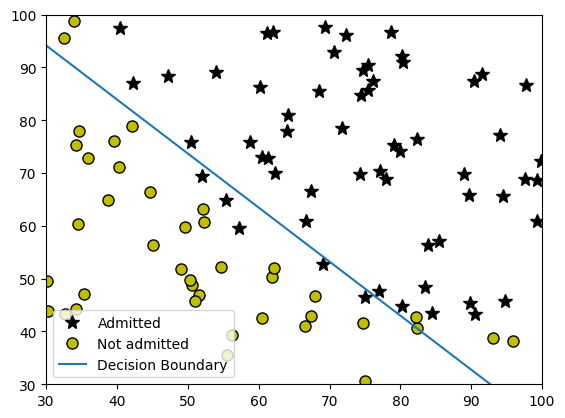

In [ ]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

In [ ]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)

    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).

    X : array_like
        The data to use for computing predictions. The rows is the number
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.

    Instructions
    ------------
    Complete the following code to make predictions using your learned
    logistic regression parameters.You should set p to a vector of 0's and 1's
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    p = sigmoid(np.dot(X, theta))
    p = np.where(p >= 0.5, 1, 0)

    return p

In [ ]:
#  Predict probability for a student with score 45 on exam 1
#  and score 85 on exam 2
prob = sigmoid(np.dot([1, 45, 85], theta))
print('Para um aluno com notas iguais a 45 e 85,'
      ' nós prevemos uma probabilidade de admissão igual a {:.3f}'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Acurácia de treino: {:.2f} %'.format(np.mean(p == y) * 100))
print('Acurácia esperada (aproximada): 89.00 %')

Para um aluno com notas iguais a 45 e 85, nós prevemos uma probabilidade de admissão igual a 0.776
Valor esperado: 0.775 +/- 0.002

Acurácia de treino: 89.00 %
Acurácia esperada (aproximada): 89.00 %


In [ ]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Utilidades/Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

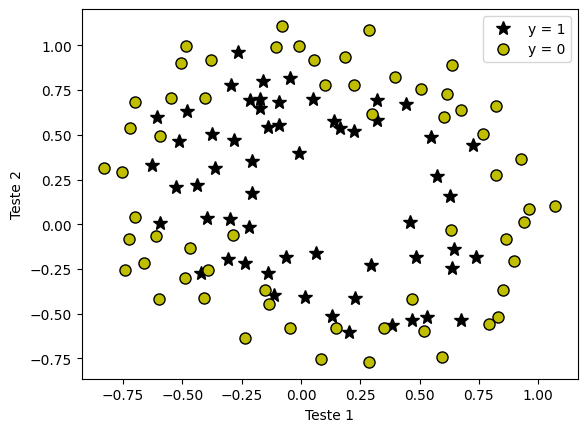

In [ ]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Teste 1')
pyplot.ylabel('Teste 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [ ]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

In [ ]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.

    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total
        number of polynomial features.

    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).

    y : array_like
        The data labels. A vector with shape (m, ).

    lambda_ : float
        The regularization parameter.

    Returns
    -------
    J : float
        The computed value for the regularized cost function.

    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.

    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(np.dot(X, theta))

    # Cust function
    J = (1/m) * np.sum((np.dot(-y, np.log(h))) - np.dot(1-y, np.log(1-h))) + (lambda_/(2*m))*(np.sum(np.square(theta[1:])))

    # Gradient
    grad = 1/m * np.dot(h-y, X)
    grad[1:] += (lambda_/m)*theta[1:]


    return J, grad

In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Custo com o theta inicial (zeros): {:.3f}'.format(cost))
print('Custo esperado (aproximado)       : 0.693\n')

print('Gradiente com o theta inicial (zeros) - apenas os primeiros cinco valores:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Gradiente esperado (aproximado) - apenas os primeiros cinco valores:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Custo com o theta de teste:  {:.2f}'.format(cost))
print('Custo esperado (aproximado): 3.16\n')

print('Gradiente com o theta de teste - apenas os primeiros cinco valores:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Gradiente esperado (aproximado) - apenas os primeiros cinco valores:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Custo com o theta inicial (zeros): 0.693
Custo esperado (aproximado)       : 0.693

Gradiente com o theta inicial (zeros) - apenas os primeiros cinco valores:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Gradiente esperado (aproximado) - apenas os primeiros cinco valores:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Custo com o theta de teste:  3.16
Custo esperado (aproximado): 3.16

Gradiente com o theta de teste - apenas os primeiros cinco valores:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Gradiente esperado (aproximado) - apenas os primeiros cinco valores:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


<ipython-input-96-0dcbd7126604>:10: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunctionReg,


Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



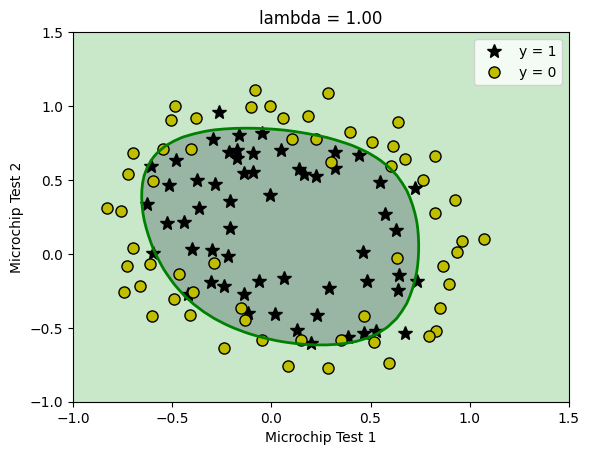

In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta.flatten(),
                        (X, y.flatten(), lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

#utils.plotDecisionBoundary(plotData, theta, X, y)
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
plotData(X[:, 1:3], y)

def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)

pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
pyplot.legend(['y = 1', 'y = 0'])
pyplot.grid(False)
pyplot.title('lambda = %0.2f' % lambda_)
z = z.T  # important to transpose z before calling contour
# print(z)

# Plot z = 0
pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

